In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse, Rectangle
import numpy as np
import math


In [2]:
%matplotlib inline

In [3]:
img_file = "/mnt/Enterprise/safal/AI_assisted_microscopy_system/cysts_dataset_all/smartphone_sample_test/test/SS_TEST0148.jpg"


In [4]:
img = mpimg.imread(img_file)


In [5]:
# function to rotate point
def rotate_point(center_x, center_y, x, y, angle):
    """Rotate a point (x, y) around the point (cx, cy) by the given angle (in radians)"""
    return (
        center_x + (x - center_x) * math.cos(angle) - (y - center_y) * math.sin(angle),
        center_y + (x - center_x) * math.sin(angle) + (y - center_y) * math.cos(angle),
    )


def ellipse_to_bounding_box(ellipse):
    """
    Convert ellipse, which is a dictionary with keys cx, cy, rx, ry,
    and theta in radians, into a bounding box that encloses the ellipse.
    """
    center_x = ellipse["cx"]
    center_y = ellipse["cy"]
    minor_axis = ellipse["rx"]
    major_axis = ellipse["ry"]
    theta = ellipse["theta"]
    orientation = math.radians(theta)
    top_left_x = center_x - minor_axis
    top_left_y = center_y - major_axis
    bottom_right_x = center_x + minor_axis
    bottom_right_y = center_y + major_axis

    # rotate the corner points around the center point
    top_left_x, top_left_y = rotate_point(
        center_x, center_y, top_left_x, top_left_y, orientation
    )
    bottom_right_x, bottom_right_y = rotate_point(
        center_x, center_y, bottom_right_x, bottom_right_y, orientation
    )

    width = bottom_right_x - top_left_x
    height = bottom_right_y - top_left_y
    return [
        top_left_x,
        top_left_y,
        width,
        height,
    ]

In [6]:
def create_ellipse(x, y, w, h, angle):
    return Ellipse((x, y), w, h, angle=angle, fill=False, color="red", clip_on=True)


def create_rectangle(x, y, w, h):
    return Rectangle((x, y), w, h, fill=False, color="blue")


import math


def parse_annotation(annotation):
    ellipses = []
    rectangles = []
    for ellipse_attribute in annotation["ellipses"]:
        x, y, w, h, angle = (
            ellipse_attribute["shape_attributes"]["cx"],
            ellipse_attribute["shape_attributes"]["cy"],
            2 * ellipse_attribute["shape_attributes"]["rx"],
            2 * ellipse_attribute["shape_attributes"]["ry"],
            math.degrees(ellipse_attribute["shape_attributes"]["theta"]),
        )
        ellipses.append(create_ellipse(x, y, w, h, angle))
        x, y, w, h = ellipse_to_bounding_box(ellipse_attribute["shape_attributes"])
        rectangles.append(create_rectangle(x, y, w, h))

    return ellipses, rectangles


In [7]:
annotations = {
    "ellipses": [
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 2007,
                "cy": 244,
                "rx": 33,
                "ry": 49,
                "theta": 0,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 1362,
                "cy": 564,
                "rx": 27,
                "ry": 22,
                "theta": 0,
            },
            "region_attributes": {"Cyst": "Crypto", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 510,
                "cy": 1231,
                "rx": 65,
                "ry": 38,
                "theta": 0,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 2099,
                "cy": 244,
                "rx": 33,
                "ry": 27,
                "theta": 0,
            },
            "region_attributes": {"Cyst": "Crypto", "Confidence": "Sure"},
        },
    ],
}


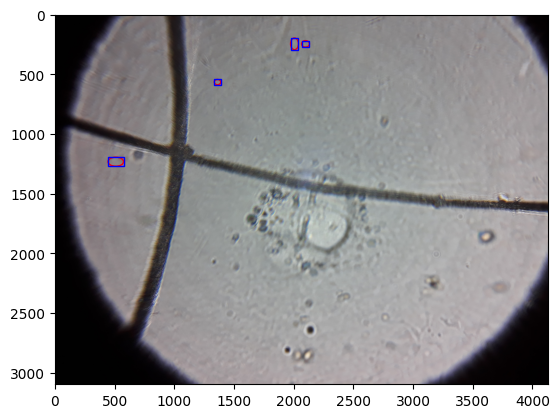

In [8]:
ellipses, rectangles = parse_annotation(annotations)

def plot_fig(img, ellipses, rectangles):
    fig, ax = plt.subplots()
    for ellipse in ellipses:
        ax.add_patch(ellipse)

    for rectangle in rectangles:
        ax.add_patch(rectangle)

    ax.imshow(img)

plot_fig(img, ellipses, rectangles)